# 1. Importing Libraies

In [16]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import dill
from scipy import stats
from collections import Counter
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 2. Common Functions

In [2]:
def dill_dump_session(dump_sess_name, dump_folder_name='dill_db'):
    dill.dump_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=dump_folder_name, sess_name=dump_sess_name))

In [3]:
def dill_load_session(dump_load_name, load_folder_name='dill_db'):
    dill.load_session('D:/BITS/Semester 4/dev/save/{folder_name}/{sess_name}.db'.format(folder_name=load_folder_name, sess_name=dump_load_name))

In [9]:
dill_dump_session('2.Common functions')

In [10]:
dill_load_session('2.Common functions')

# 3. Importing dataset

In [11]:
original_df = pd.read_csv('../data/train.csv')

In [5]:
original_df

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1


In [13]:
dill_dump_session('3.Importing dataset')

# 4. Data Pre-Processing

In [4]:
dill_load_session('3.Importing dataset')

In [14]:
original_dpp_df = original_df
original_dpp_df

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1


## 4.1 Check for missing values

In [15]:
original_dpp_df.isnull()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
25486,False,False,False,False,False,False,False,False,False,False
25487,False,False,False,False,False,False,False,False,False,False
25488,False,False,False,False,False,False,False,False,False,False
25489,False,False,False,False,False,False,False,False,False,False


In [17]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().values.any()

False

In [16]:
# being double sure, that no missing values are present..
original_dpp_df.isnull().sum()

satisfaction_level        0
last_evaluation_rating    0
projects_worked_on        0
average_montly_hours      0
time_spend_company        0
Work_accident             0
promotion_last_5years     0
Department                0
salary                    0
Attrition                 0
dtype: int64

## 4.2 Check for outliers

In [20]:
original_dpp_df

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
25486,4.0,5.7,2,151,3,0,0,support,low,1
25487,3.7,4.8,2,160,3,0,0,support,low,1
25488,3.7,5.3,2,143,3,0,0,support,low,1
25489,1.1,9.6,6,280,4,0,0,support,low,1


### 4.2.1 Outliers present in satisfaction_level

In [21]:
z_score_satisfaction_level = stats.zscore(original_dpp_df['satisfaction_level'])

In [30]:
z_score_satisfaction_level

array([-0.94024626,  0.7490331 , -2.02621156, ..., -0.98046719,
       -2.02621156, -0.98046719])

In [41]:
sum(z_score_satisfaction_level>3)

0

In [42]:
sum(z_score_satisfaction_level<-3)

0

### 4.2.2 Outliers present in last_evaluation_rating

In [49]:
z_score_last_evaluation_rating = stats.zscore(original_dpp_df['last_evaluation_rating'])

In [50]:
z_score_last_evaluation_rating

array([-1.09183923,  0.83717252,  0.95408232, ..., -1.09183923,
        1.42172153, -1.15029413])

In [52]:
z_score_last_evaluation_rating_round = [round(num, 2) for num in z_score_last_evaluation_rating]

In [55]:
count_of_z_score_last_evaluation_rating_round = {i:z_score_last_evaluation_rating_round.count(i) for i in np.unique(z_score_last_evaluation_rating_round)}
count_of_z_score_last_evaluation_rating_round

{-2.09: 39,
 -2.03: 91,
 -1.97: 83,
 -1.91: 89,
 -1.85: 100,
 -1.79: 97,
 -1.73: 97,
 -1.68: 81,
 -1.62: 71,
 -1.56: 194,
 -1.5: 353,
 -1.44: 292,
 -1.38: 508,
 -1.33: 552,
 -1.27: 593,
 -1.21: 596,
 -1.15: 516,
 -1.09: 549,
 -1.03: 575,
 -0.97: 608,
 -0.92: 541,
 -0.86: 558,
 -0.8: 378,
 -0.74: 450,
 -0.68: 377,
 -0.62: 400,
 -0.57: 395,
 -0.51: 407,
 -0.45: 398,
 -0.39: 337,
 -0.33: 384,
 -0.27: 407,
 -0.22: 366,
 -0.16: 327,
 -0.1: 381,
 -0.04: 342,
 0.02: 365,
 0.08: 383,
 0.14: 447,
 0.19: 399,
 0.25: 370,
 0.31: 422,
 0.37: 366,
 0.43: 397,
 0.49: 427,
 0.54: 430,
 0.6: 407,
 0.66: 461,
 0.72: 510,
 0.78: 547,
 0.84: 462,
 0.9: 566,
 0.95: 397,
 1.01: 504,
 1.07: 536,
 1.13: 485,
 1.19: 466,
 1.25: 463,
 1.3: 452,
 1.36: 433,
 1.42: 426,
 1.48: 460,
 1.54: 447,
 1.6: 457,
 1.66: 474}

In [59]:
print(sum(z_score_last_evaluation_rating>3))
print(sum(z_score_last_evaluation_rating<-3))

0
0


### 4.2.3 Outliers present in projects_worked_on

In [60]:
z_score_projects_worked_on = stats.zscore(original_dpp_df['projects_worked_on'])

In [61]:
z_score_projects_worked_on

array([-0.91766488,  1.34784991,  2.8581931 , ..., -1.67283647,
        1.34784991, -1.67283647])

In [62]:
print(sum(z_score_projects_worked_on>3))
print(sum(z_score_projects_worked_on<-3))

0
0


### 4.2.4 Outliers present in avg_monthly_hours

In [65]:
z_score_avg_monthly_hours = stats.zscore(original_dpp_df['average_montly_hours'])

In [66]:
z_score_avg_monthly_hours

array([-0.76296079,  1.32942577,  1.52870068, ..., -1.24122057,
        1.4888457 , -0.94230821])

In [67]:
print(sum(z_score_avg_monthly_hours>3))
print(sum(z_score_avg_monthly_hours<-3))

0
0


### 4.2.5 Outliers present in time_spend_company

In [68]:
z_score_time_spend_company = stats.zscore(original_dpp_df['time_spend_company'])

In [69]:
z_score_time_spend_company

array([-0.34105817,  1.71699764,  0.34496043, ..., -0.34105817,
        0.34496043, -0.34105817])

In [72]:
print(sum(z_score_time_spend_company>3))
print(sum(z_score_time_spend_company<-3))

625
0


In [86]:
original_dpp_df.shape

(25491, 10)

In [104]:
z_score_time_spend_company_index = list(np.where(z_score_time_spend_company > 3)[0])
z_score_time_spend_company_index[0:10]

[7748,
 7749,
 7750,
 7751,
 7752,
 7798,
 7799,
 7824,
 7825,
 7826,
 7827,
 7873,
 7874,
 7875,
 7876,
 7888,
 7889,
 7890,
 7891,
 7892,
 7899,
 7900,
 7902,
 7903,
 7923,
 7924,
 7925,
 7926,
 7937,
 7938,
 7939,
 7940,
 7941,
 7946,
 7947,
 7948,
 7949,
 7983,
 7984,
 7985,
 7986,
 7987,
 7988,
 8078,
 8079,
 8080,
 8082,
 8083,
 8084,
 8087,
 8091,
 8092,
 8093,
 8094,
 8095,
 8110,
 8111,
 8112,
 8113,
 8115,
 8116,
 8118,
 8124,
 8125,
 8126,
 8127,
 8141,
 8142,
 8143,
 8145,
 8146,
 8147,
 8148,
 8149,
 8155,
 8156,
 8157,
 8159,
 8160,
 8161,
 8162,
 8179,
 8180,
 8182,
 8183,
 8184,
 8187,
 8191,
 8192,
 8193,
 8194,
 8195,
 8232,
 8233,
 8234,
 8236,
 8237,
 8238,
 8239,
 8240,
 8244,
 8245,
 8246,
 8247,
 8248,
 8359,
 8360,
 8361,
 8365,
 8366,
 8367,
 8376,
 8377,
 8378,
 8379,
 8396,
 8397,
 8406,
 8407,
 8408,
 8409,
 8410,
 9250,
 9251,
 9252,
 9305,
 9306,
 9307,
 9334,
 9335,
 9336,
 9337,
 9338,
 9387,
 9388,
 9389,
 9390,
 9391,
 9392,
 9403,
 9404,
 9405,
 9406,

In [108]:
original_dpp_time_spend_company_outliers_removed_df = original_dpp_df.drop(z_score_time_spend_company_index)

In [109]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

### 4.2.6 Outliers present in work_accident

In [110]:
z_score_work_accident = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['Work_accident'])

In [56]:
z_score_work_accident

array([-0.40936816, -0.40936816, -0.40936816, ..., -0.40936816,
       -0.40936816, -0.40936816])

In [57]:
print(sum(z_score_work_accident>3))
print(sum(z_score_work_accident<-3))

0
0


### 4.2.7 Outliers present in promotion_last_5_years

In [143]:
original_dpp_time_spend_company_outliers_removed_df.reset_index(drop=True, inplace=True)
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [144]:
z_score_promotion_last_5_years = stats.zscore(original_dpp_time_spend_company_outliers_removed_df['promotion_last_5years'])

In [145]:
z_score_promotion_last_5_years

array([-0.14310317, -0.14310317, -0.14310317, ..., -0.14310317,
       -0.14310317, -0.14310317])

In [146]:
print(sum(z_score_promotion_last_5_years>3))
print(sum(z_score_promotion_last_5_years<-3))

499
0


In [147]:
original_dpp_time_spend_company_outliers_removed_df.shape

(24866, 10)

In [148]:
z_score_promotion_last_5_years_index = list(np.where(z_score_promotion_last_5_years > 3)[0])
z_score_promotion_last_5_years_index[0:10]

[198,
 390,
 507,
 682,
 3173,
 3174,
 3175,
 3176,
 3177,
 3178,
 3179,
 3180,
 3201,
 3202,
 3203,
 3204,
 3205,
 3206,
 3207,
 3208,
 3209,
 3210,
 3211,
 3212,
 3213,
 3214,
 3215,
 3216,
 3217,
 3218,
 3219,
 3220,
 3221,
 3222,
 3344,
 3345,
 3346,
 3347,
 3348,
 3349,
 3350,
 3351,
 3352,
 3353,
 3553,
 3554,
 3555,
 3556,
 3557,
 3558,
 3559,
 3560,
 3568,
 3569,
 3570,
 3571,
 3614,
 3615,
 3616,
 3617,
 3618,
 3619,
 3921,
 3922,
 3923,
 3924,
 3925,
 3926,
 3927,
 3928,
 3929,
 3930,
 7578,
 7579,
 7580,
 7581,
 7637,
 7638,
 7693,
 7694,
 7695,
 7696,
 7697,
 7698,
 7699,
 7850,
 7851,
 7852,
 7853,
 7854,
 7855,
 7856,
 7872,
 7873,
 7874,
 7901,
 7902,
 7903,
 7904,
 7905,
 7906,
 7972,
 7973,
 7974,
 7975,
 7976,
 7977,
 8010,
 8011,
 8012,
 8013,
 8014,
 8130,
 8131,
 8132,
 8133,
 8143,
 8163,
 8164,
 8165,
 8166,
 8167,
 8182,
 8183,
 8184,
 8231,
 8232,
 8233,
 8234,
 8260,
 8261,
 8262,
 8263,
 8264,
 8398,
 8665,
 8956,
 8957,
 8958,
 8959,
 8960,
 9020,
 9021,
 90

In [149]:
len(z_score_promotion_last_5_years_index)

499

In [150]:
original_dpp_promotion_last_5_years_outliers_removed_df = original_dpp_time_spend_company_outliers_removed_df.drop(z_score_promotion_last_5_years_index)

In [151]:
original_dpp_promotion_last_5_years_outliers_removed_df.shape

(24367, 10)

In [152]:
original_dpp_all_outliers_removed_df = original_dpp_promotion_last_5_years_outliers_removed_df
original_dpp_all_outliers_removed_df.shape

(24367, 10)

## 4.3 Check for noise

In [153]:
original_dpp_all_outliers_removed_df['satisfaction_level'].dtypes

dtype('float64')

In [154]:
original_dpp_all_outliers_removed_df['last_evaluation_rating'].dtypes

dtype('float64')

In [155]:
original_dpp_all_outliers_removed_df['projects_worked_on'].dtypes

dtype('int64')

In [156]:
original_dpp_all_outliers_removed_df['average_montly_hours'].dtypes

dtype('int64')

In [157]:
original_dpp_all_outliers_removed_df['time_spend_company'].dtypes

dtype('int64')

In [158]:
original_dpp_all_outliers_removed_df['Work_accident'].dtypes

dtype('int64')

In [159]:
original_dpp_all_outliers_removed_df['promotion_last_5years'].dtypes

dtype('int64')

In [55]:
original_dpp_all_outliers_removed_df.to_csv('../save/csv/4.2_4.3_original_dpp_all_outliers_and_noise_removed_df.csv', index=False)

## 4.4 Create dummy variables

In [59]:
print(original_dpp_all_outliers_removed_df.shape)
original_dpp_all_outliers_removed_df.head(10)

(24367, 10)


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,False,False,sales,low,1
1,8.0,8.6,6,272,6,False,False,sales,medium,1
2,1.1,8.8,8,282,4,False,False,sales,medium,1
3,3.7,5.2,3,169,3,False,False,sales,low,1
4,4.1,5.0,3,163,3,False,False,sales,low,1
5,1.0,7.7,7,257,4,False,False,sales,low,1
6,9.2,8.5,6,269,5,False,False,sales,low,1
7,8.9,10.0,6,234,5,False,False,sales,low,1
8,4.2,5.3,3,152,3,False,False,sales,low,1
9,1.1,8.1,7,315,4,False,False,sales,low,1


In [186]:
# promotion_last_5years = original_dpp_all_outliers_removed_df['promotion_last_5years'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['promotion_last_5years'] = promotion_last_5years
# original_dpp_all_outliers_removed_df.head(10)

In [187]:
# work_accident = original_dpp_all_outliers_removed_df['Work_accident'].replace({0:False, 1:True})
# original_dpp_all_outliers_removed_df['Work_accident'] = work_accident
# original_dpp_all_outliers_removed_df.head(10)

In [6]:
print(original_dpp_all_outliers_removed_df.shape)

(24367, 10)


In [184]:
original_dpp_dummy_variables_df = pd.get_dummies(original_dpp_all_outliers_removed_df, columns=['Work_accident', 'promotion_last_5years', 'Department', 'salary'])

In [45]:
print(original_dpp_dummy_variables_df.shape)
original_dpp_dummy_variables_df.head(10)

(24367, 22)


,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1.0,7.7,7,257,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,9.2,8.5,6,269,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8.9,10.0,6,234,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.2,5.3,3,152,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,1.1,8.1,7,315,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [190]:
dill_dump_session('4.4_Create_dummy_variables')

In [54]:
original_dpp_dummy_variables_df.to_csv('../save/csv/4.4_original_dpp_dummy_variables_df.csv', index=False)

## 4.5 Normalizing the dataset

In [28]:
dill_load_session('4.4_Create_dummy_variables')

In [30]:
original_dpp_normalized_df = original_dpp_dummy_variables_df.copy()

In [31]:
original_dpp_normalized_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1.0,7.7,7,257,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,9.2,8.5,6,269,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8.9,10.0,6,234,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.2,5.3,3,152,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,1.1,8.1,7,315,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [32]:
original_dpp_normalized_df.dtypes

satisfaction_level             float64
last_evaluation_rating         float64
projects_worked_on               int64
average_montly_hours             int64
time_spend_company               int64
Attrition                        int64
Work_accident_False              uint8
Work_accident_True               uint8
promotion_last_5years_False      uint8
Department_IT                    uint8
Department_RandD                 uint8
Department_accounting            uint8
Department_hr                    uint8
Department_management            uint8
Department_marketing             uint8
Department_product_mng           uint8
Department_sales                 uint8
Department_support               uint8
Department_technical             uint8
salary_high                      uint8
salary_low                       uint8
salary_medium                    uint8
dtype: object

In [33]:
normalize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [34]:
min_max_scaler = MinMaxScaler()
original_dpp_normalized_df[normalize_these_columns] = min_max_scaler.fit_transform(original_dpp_normalized_df[normalize_these_columns])

In [35]:
# original_dpp_normalized_df[normalize_these_columns] = original_dpp_normalized_df[normalize_these_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [36]:
original_dpp_normalized_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.166667,0.316964,0.2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.780220,0.781250,0.666667,0.785714,0.8,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.021978,0.812500,1.000000,0.830357,0.4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.307692,0.250000,0.166667,0.325893,0.2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.351648,0.218750,0.166667,0.299107,0.2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,0.010989,0.640625,0.833333,0.718750,0.4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,0.912088,0.765625,0.666667,0.772321,0.6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0.879121,1.000000,0.666667,0.616071,0.6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,0.362637,0.265625,0.166667,0.250000,0.2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,0.021978,0.703125,0.833333,0.977679,0.4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [53]:
original_dpp_normalized_df.to_csv('../save/csv/4.5_original_dpp_normalized_df.csv', index=False)

## 4.6 Standardizing the dataset

In [39]:
original_dpp_standardized_df = original_dpp_dummy_variables_df.copy()

In [40]:
original_dpp_standardized_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1.0,7.7,7,257,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,9.2,8.5,6,269,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8.9,10.0,6,234,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.2,5.3,3,152,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,1.1,8.1,7,315,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [41]:
standardize_these_columns = ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']

In [42]:
std_scaler = StandardScaler()

In [43]:
original_dpp_standardized_df[standardize_these_columns] = std_scaler.fit_transform(original_dpp_standardized_df[standardize_these_columns])

In [44]:
original_dpp_standardized_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,-0.925780,-1.090248,-0.914378,-0.764155,-0.303931,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.754786,0.835726,1.336042,1.324454,2.322891,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,-2.006143,0.952452,2.836322,1.523369,0.571676,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,-0.965793,-1.148610,-0.914378,-0.724372,-0.303931,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,-0.805739,-1.265336,-0.914378,-0.843721,-0.303931,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,-2.046156,0.310461,2.086182,1.026081,0.571676,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,1.234947,0.777363,1.336042,1.264780,1.447284,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,1.114907,1.652806,1.336042,0.568576,1.447284,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,-0.765726,-1.090248,-0.914378,-1.062528,-0.303931,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,-2.006143,0.543912,2.086182,2.179789,0.571676,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [52]:
original_dpp_standardized_df.to_csv('../save/csv/4.6_original_dpp_standardized_df.csv', index=False)

In [58]:
dill_dump_session('4.6_all_data_preprocessing_completed')

# 5. EDA & Feature Correlation Plots

In [62]:
# dill_load_session('4.6_all_data_preprocessing_completed')

In [91]:
eda_df = original_dpp_dummy_variables_df.copy()

## 5.1 Statistical Overview

In [68]:
eda_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1.0,7.7,7,257,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,9.2,8.5,6,269,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8.9,10.0,6,234,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.2,5.3,3,152,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,1.1,8.1,7,315,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [69]:
eda_df.describe()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
count,24367.00000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.0,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000,24367.000000
mean,6.11367,7.168051,4.218944,205.416137,3.347109,0.244757,0.858579,0.141421,1.0,0.084582,0.052284,0.051627,0.050642,0.033898,0.054869,0.060984,0.272171,0.152050,0.186892,0.077482,0.496902,0.425617
std,2.49921,1.713454,1.333112,50.273714,1.142088,0.429952,0.348462,0.348462,0.0,0.278264,0.222603,0.221278,0.219271,0.180971,0.227730,0.239306,0.445087,0.359077,0.389833,0.267360,0.500001,0.494446
min,0.90000,3.600000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.40000,5.600000,3.000000,160.000000,3.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.40000,7.200000,4.000000,204.000000,3.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.20000,8.700000,5.000000,250.000000,4.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,10.00000,10.000000,8.000000,320.000000,7.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24367 entries, 0 to 24865
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   satisfaction_level           24367 non-null  float64
 1   last_evaluation_rating       24367 non-null  float64
 2   projects_worked_on           24367 non-null  int64  
 3   average_montly_hours         24367 non-null  int64  
 4   time_spend_company           24367 non-null  int64  
 5   Attrition                    24367 non-null  int64  
 6   Work_accident_False          24367 non-null  uint8  
 7   Work_accident_True           24367 non-null  uint8  
 8   promotion_last_5years_False  24367 non-null  uint8  
 9   Department_IT                24367 non-null  uint8  
 10  Department_RandD             24367 non-null  uint8  
 11  Department_accounting        24367 non-null  uint8  
 12  Department_hr                24367 non-null  uint8  
 13  Department_manag

## 5.2 Correlation

In [93]:
eda_df.head(10)

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
5,1.0,7.7,7,257,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,9.2,8.5,6,269,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
7,8.9,10.0,6,234,5,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
8,4.2,5.3,3,152,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
9,1.1,8.1,7,315,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


<AxesSubplot:>

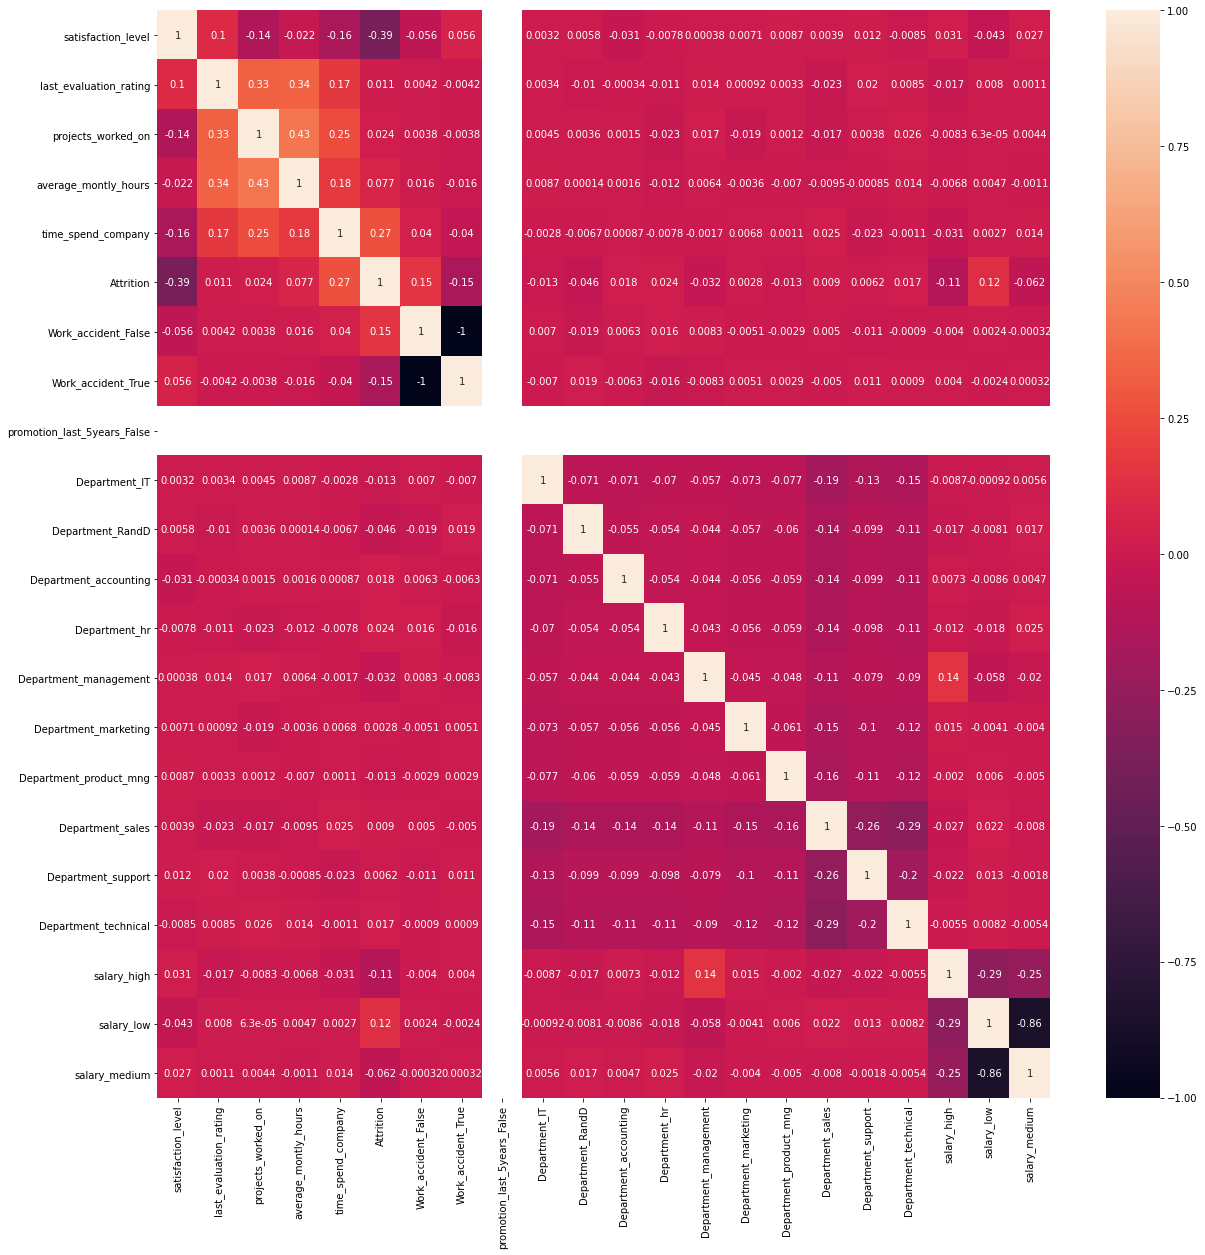

In [94]:
plt.subplots(figsize=(20, 20))
sns.heatmap(eda_df.corr(), annot = True)

In [73]:
eda_df.corr()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.101427,-0.137219,-0.021733,-0.155074,-0.388589,-0.055815,0.055815,NaN,0.003230,0.005834,-0.030917,-0.007801,0.000382,0.007083,0.008735,0.003861,0.011582,-0.008452,0.031023,-0.042851,0.026557
last_evaluation_rating,0.101427,1.000000,0.332876,0.340919,0.168917,0.010660,0.004207,-0.004207,NaN,0.003395,-0.010351,-0.000336,-0.010888,0.014015,0.000917,0.003291,-0.022694,0.019683,0.008522,-0.017002,0.008002,0.001102
projects_worked_on,-0.137219,0.332876,1.000000,0.429424,0.253738,0.024074,0.003753,-0.003753,NaN,0.004509,0.003605,0.001470,-0.023191,0.016527,-0.019430,0.001241,-0.017018,0.003756,0.025818,-0.008333,0.000063,0.004442
average_montly_hours,-0.021733,0.340919,0.429424,1.000000,0.177453,0.076901,0.015572,-0.015572,NaN,0.008749,0.000142,0.001644,-0.011502,0.006407,-0.003618,-0.007001,-0.009491,-0.000852,0.014269,-0.006829,0.004713,-0.001073
time_spend_company,-0.155074,0.168917,0.253738,0.177453,1.000000,0.268358,0.039923,-0.039923,NaN,-0.002762,-0.006654,0.000867,-0.007757,-0.001730,0.006772,0.001081,0.024623,-0.023021,-0.001082,-0.030556,0.002674,0.013818
Attrition,-0.388589,0.010660,0.024074,0.076901,0.268358,1.000000,0.154342,-0.154342,NaN,-0.013188,-0.045806,0.018159,0.024365,-0.032264,0.002833,-0.013047,0.008958,0.006161,0.016987,-0.114285,0.122082,-0.061657
Work_accident_False,-0.055815,0.004207,0.003753,0.015572,0.039923,0.154342,1.000000,-1.000000,NaN,0.006970,-0.018957,0.006338,0.015852,0.008339,-0.005131,-0.002879,0.005002,-0.011492,-0.000897,-0.003964,0.002432,-0.000316
Work_accident_True,0.055815,-0.004207,-0.003753,-0.015572,-0.039923,-0.154342,-1.000000,1.000000,NaN,-0.006970,0.018957,-0.006338,-0.015852,-0.008339,0.005131,0.002879,-0.005002,0.011492,0.000897,0.003964,-0.002432,0.000316
promotion_last_5years_False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department_IT,0.003230,0.003395,0.004509,0.008749,-0.002762,-0.013188,0.006970,-0.006970,NaN,1.000000,-0.071396,-0.070921,-0.070205,-0.056938,-0.073240,-0.077464,-0.185881,-0.128717,-0.145730,-0.008655,-0.000919,0.005609


## 5.3 Uni-Variate Plots

### 5.3.1 Histogram + Distribution Plots

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

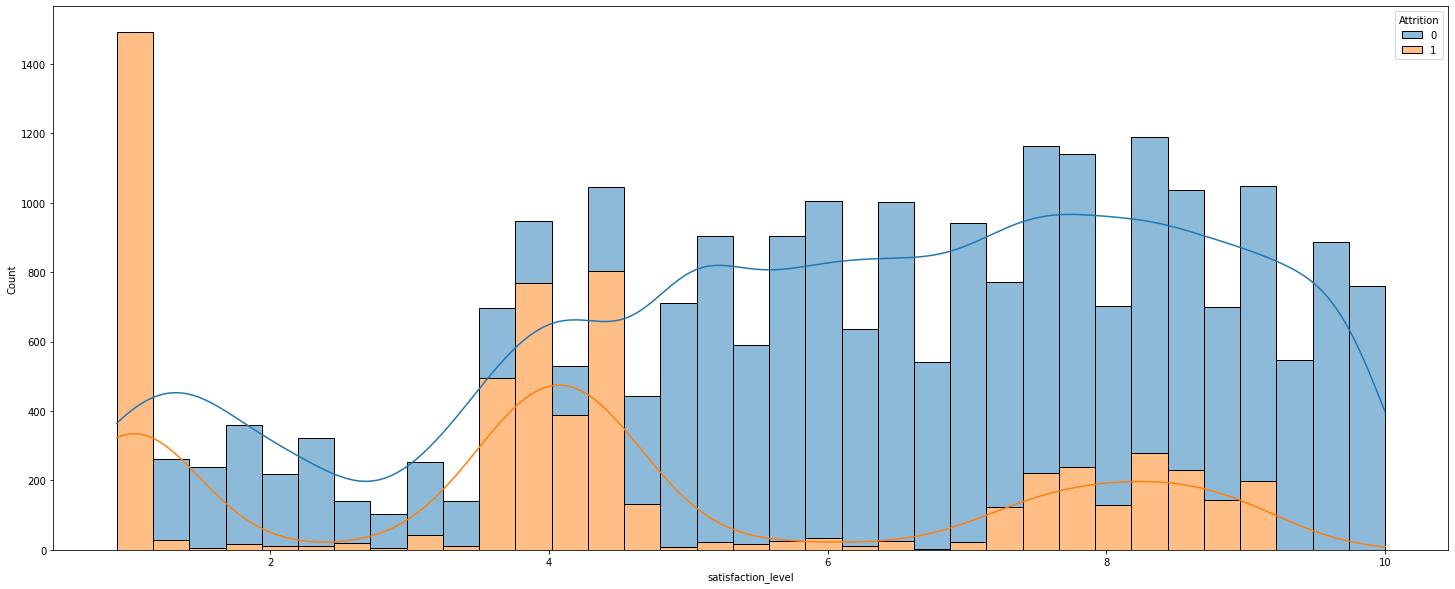

In [160]:
plt.subplots(figsize=(25, 10))
# sns.scatterplot(x=eda_df.index, y=eda_df['satisfaction_level'], hue=eda_df['Attrition'])
sns.histplot(data=eda_df, x="satisfaction_level", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='last_evaluation_rating', ylabel='Count'>

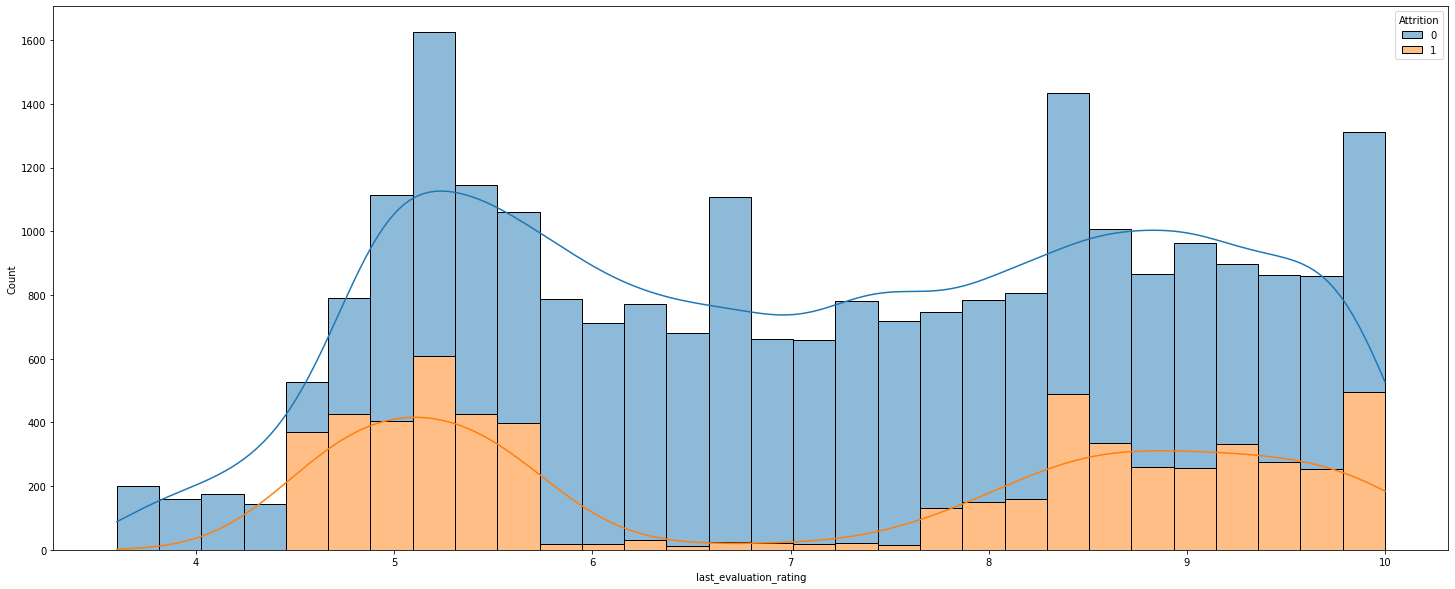

In [161]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="last_evaluation_rating", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='projects_worked_on', ylabel='Count'>

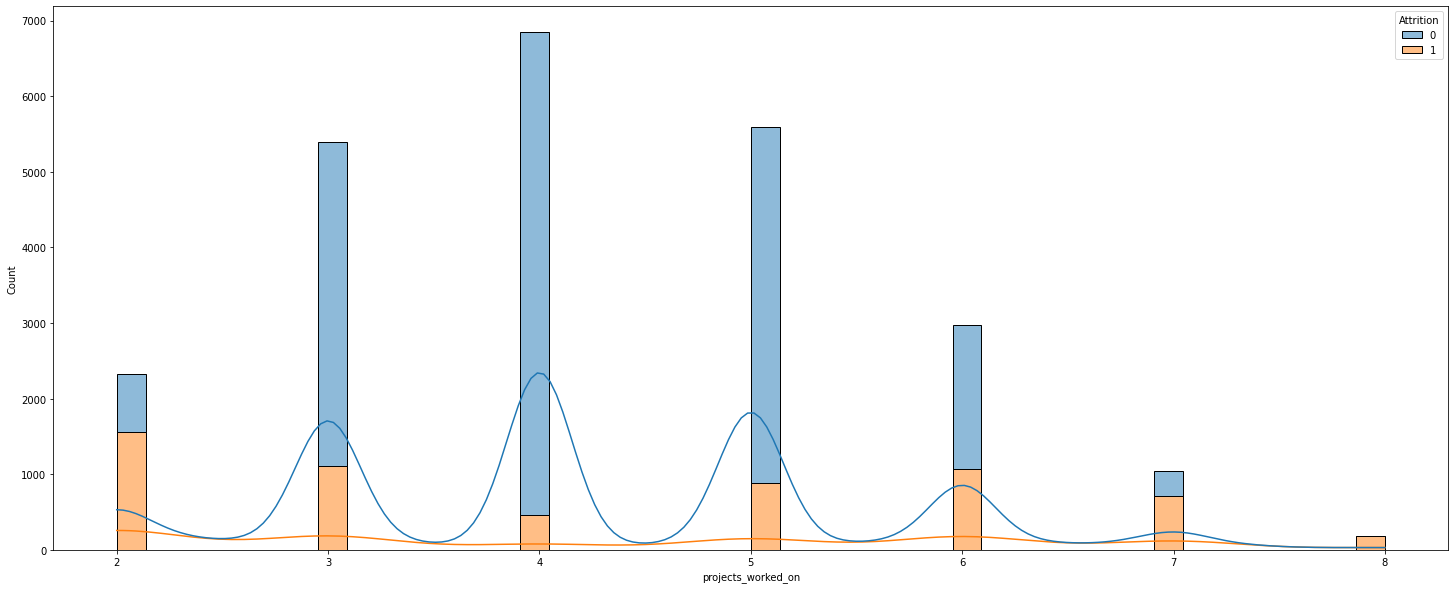

In [159]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="projects_worked_on", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='average_montly_hours', ylabel='Count'>

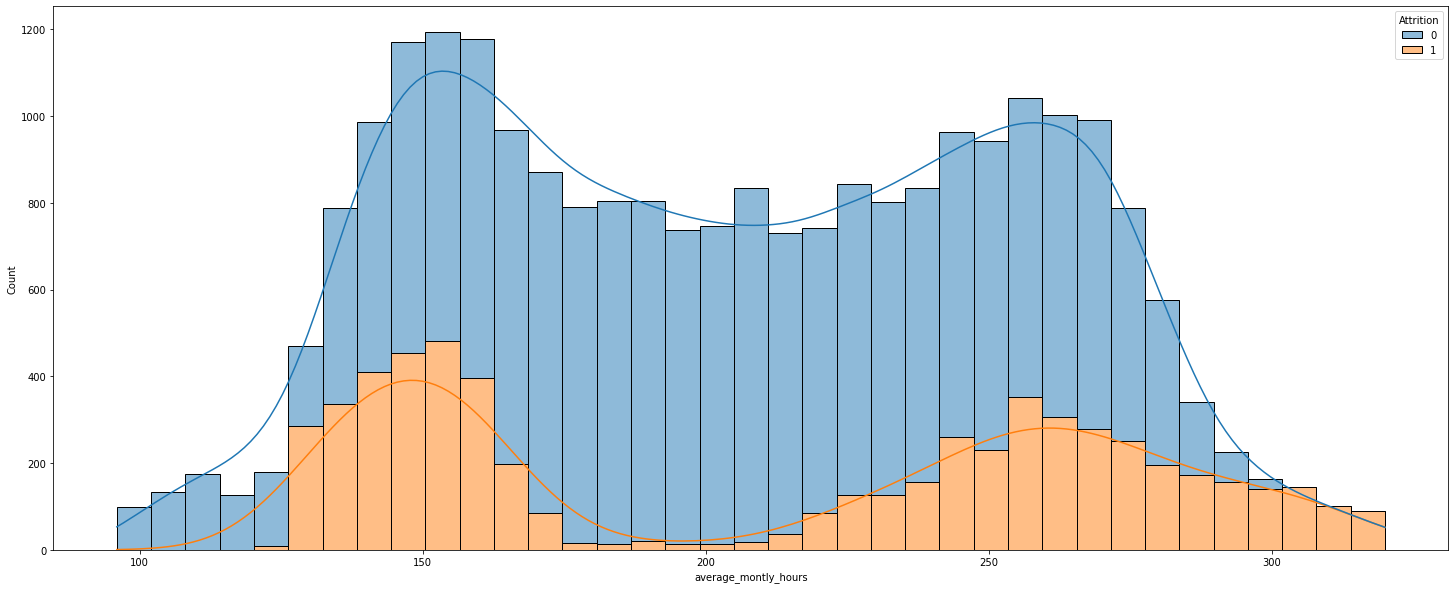

In [162]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="average_montly_hours", kde=True, hue=eda_df['Attrition'], multiple="stack")

<AxesSubplot:xlabel='time_spend_company', ylabel='Count'>

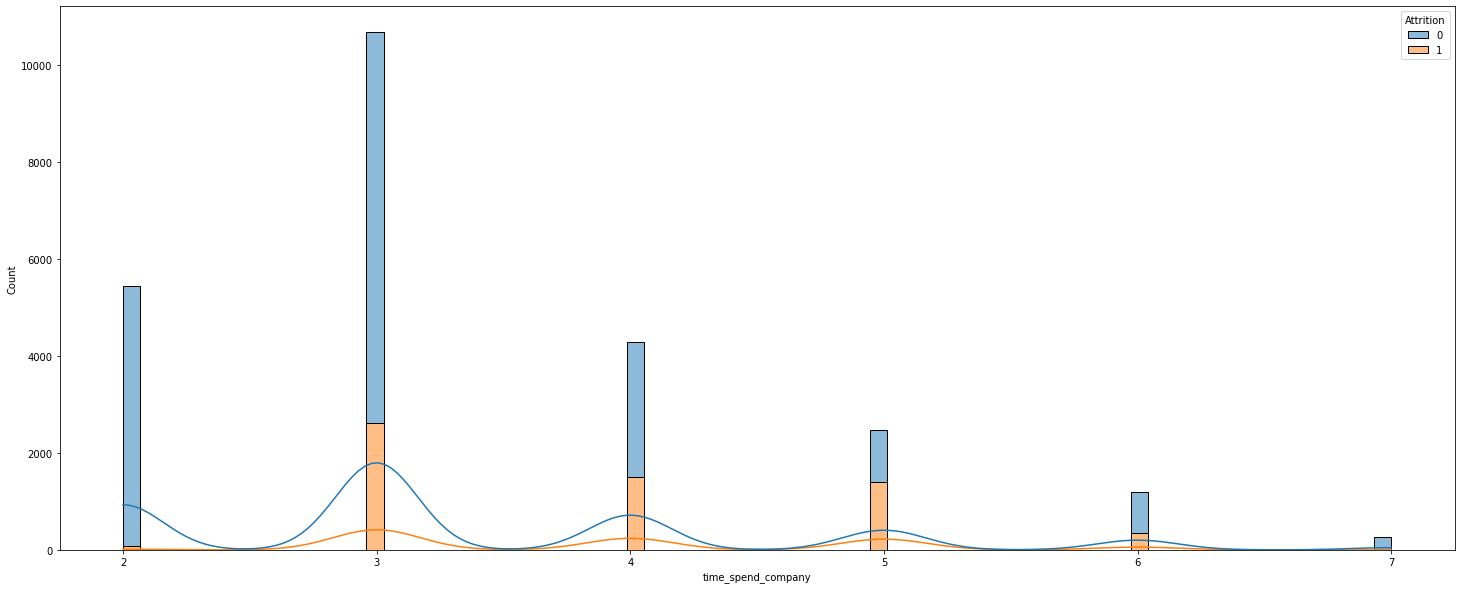

In [163]:
plt.subplots(figsize=(25, 10))
sns.histplot(data=eda_df, x="time_spend_company", kde=True, hue=eda_df['Attrition'], multiple="stack")

In [117]:
original_dpp_all_outliers_removed_df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,False,False,sales,low,1
1,8.0,8.6,6,272,6,False,False,sales,medium,1
2,1.1,8.8,8,282,4,False,False,sales,medium,1
3,3.7,5.2,3,169,3,False,False,sales,low,1
4,4.1,5.0,3,163,3,False,False,sales,low,1


In [130]:
eda_df.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Attrition,Work_accident_False,Work_accident_True,promotion_last_5years_False,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,3.8,5.3,3,167,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,8.0,8.6,6,272,6,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.1,8.8,8,282,4,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,3.7,5.2,3,169,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4.1,5.0,3,163,3,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### 5.3.2 Bar Plots

<AxesSubplot:>

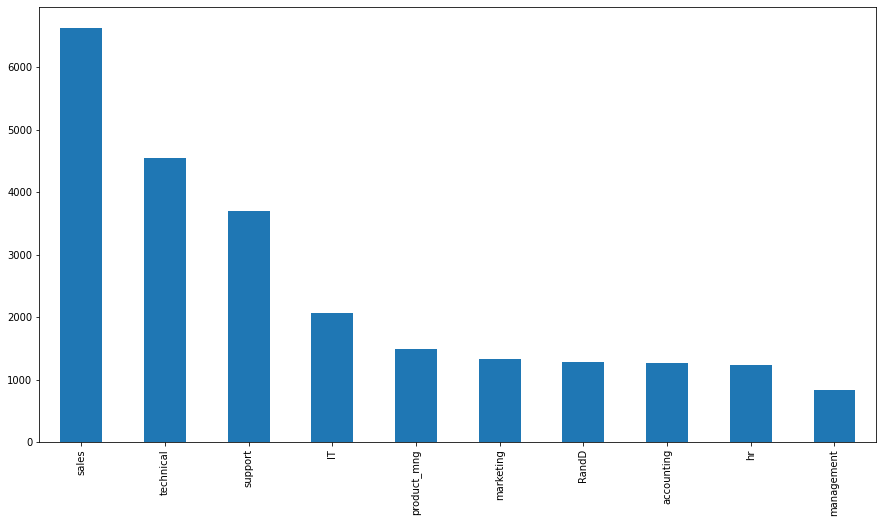

In [156]:
plt.subplots(figsize=(15, 8))
original_dpp_all_outliers_removed_df['Department'].value_counts().plot.bar()

<AxesSubplot:>

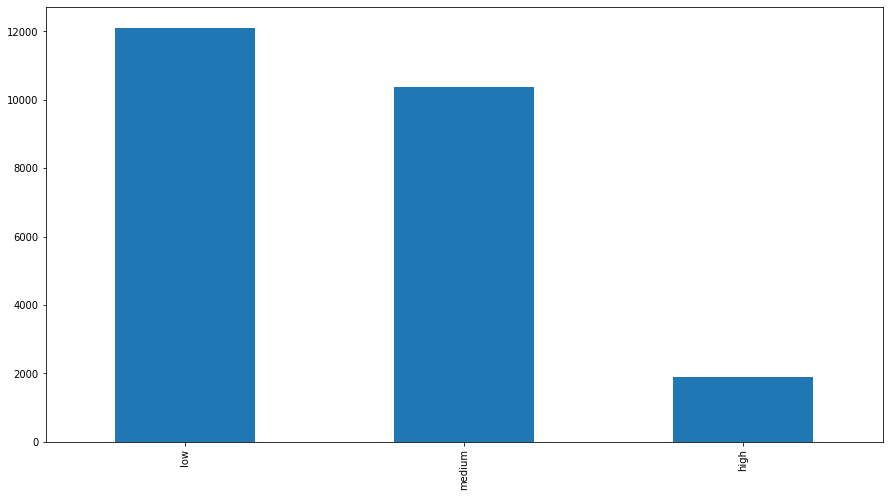

In [155]:
plt.subplots(figsize=(15, 8))
original_dpp_all_outliers_removed_df['salary'].value_counts().plot.bar()

<AxesSubplot:>

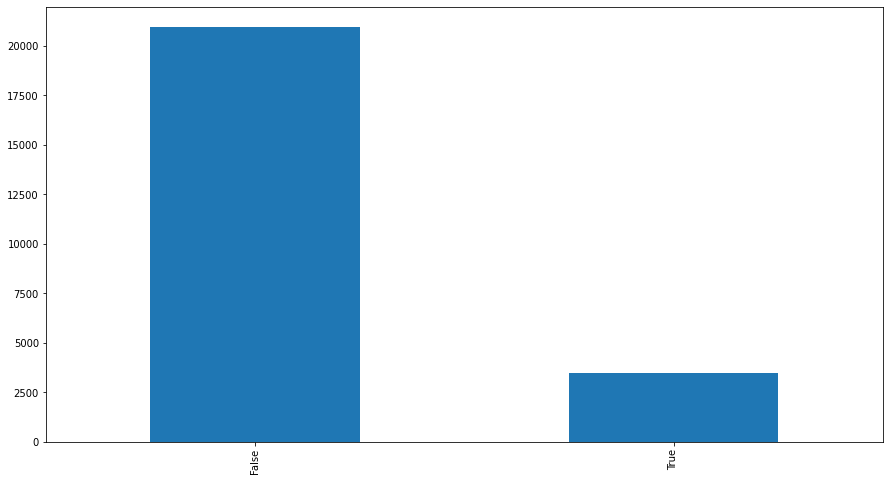

In [154]:
plt.subplots(figsize=(15, 8))
original_dpp_all_outliers_removed_df['Work_accident'].value_counts().plot.bar()

### 5.3.3 Count Plots

<AxesSubplot:xlabel='Department', ylabel='count'>

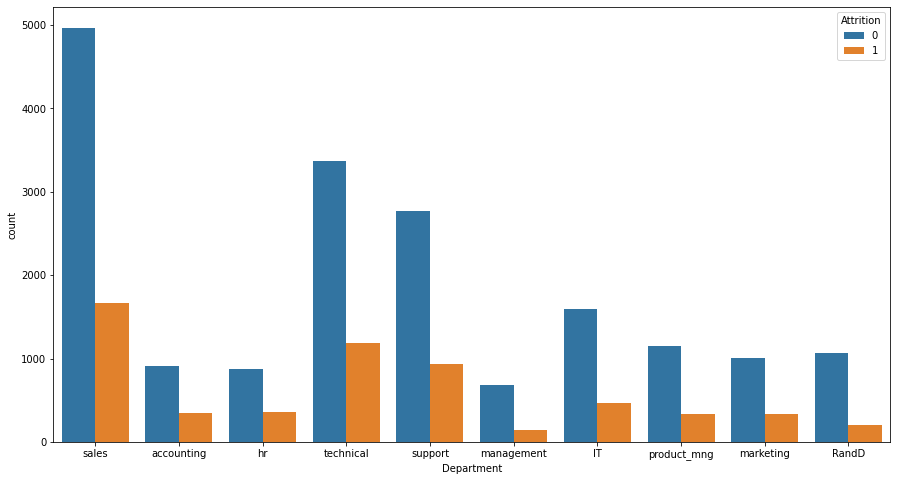

In [168]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Department", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='salary', ylabel='count'>

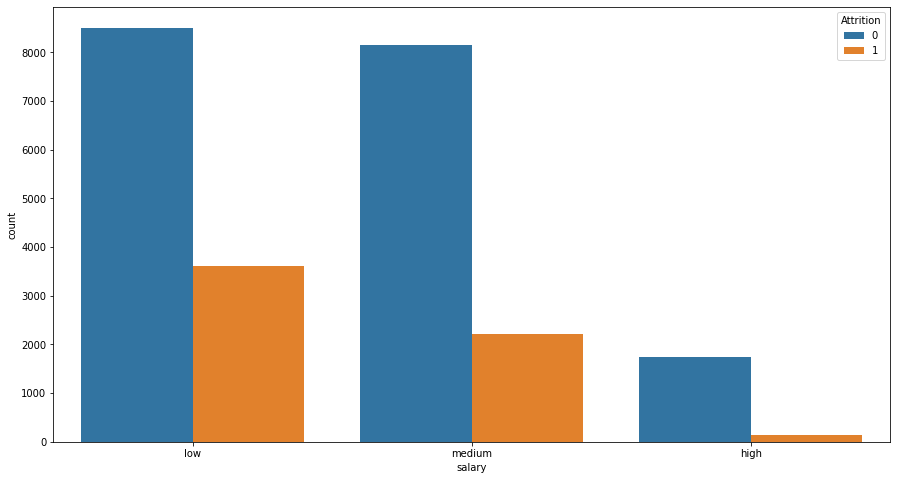

In [169]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="salary", hue="Attrition", data=original_dpp_all_outliers_removed_df)

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

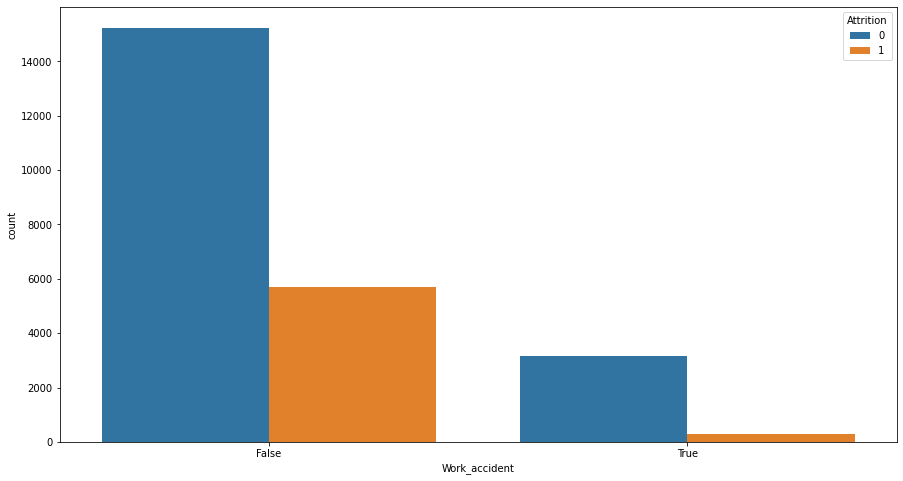

In [170]:
plt.subplots(figsize=(15, 8))
sns.countplot(x="Work_accident", hue="Attrition", data=original_dpp_all_outliers_removed_df)

### 5.3.4 PDF & CDF Plots

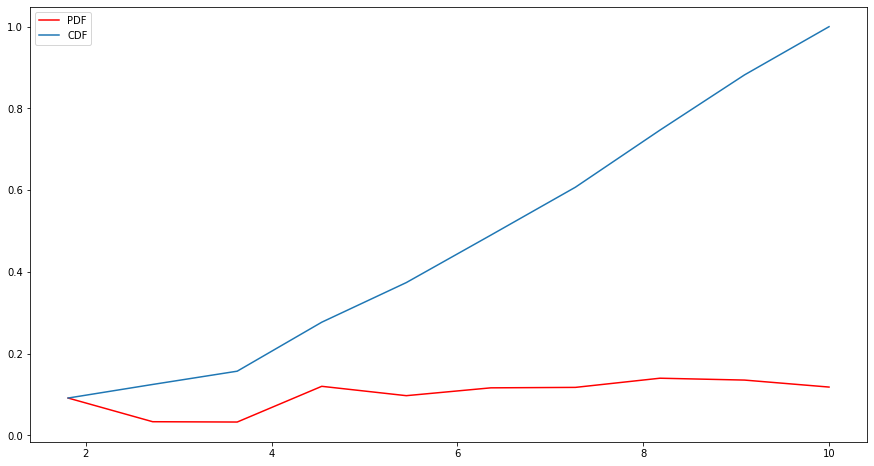

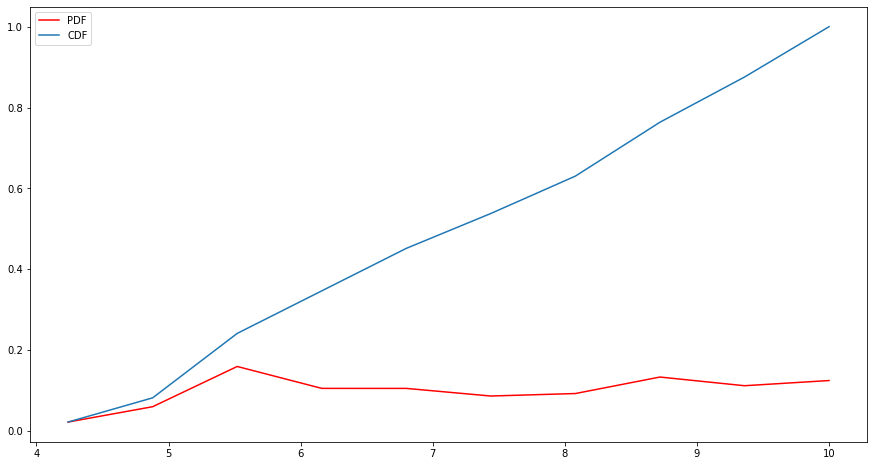

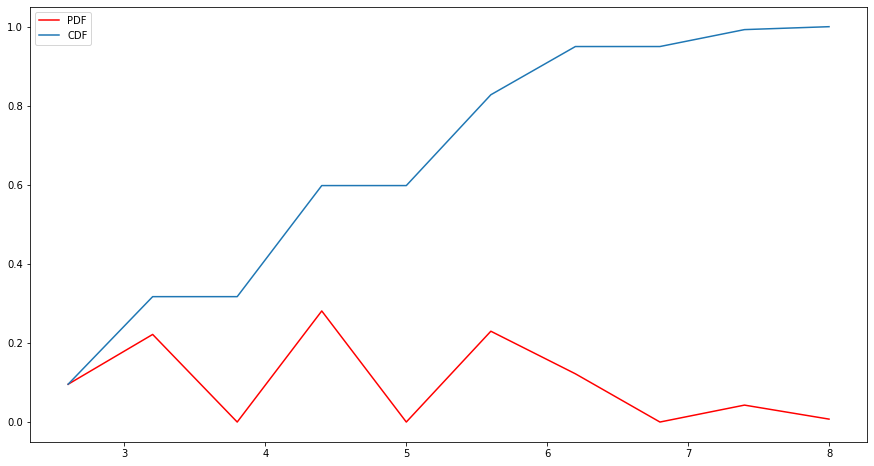

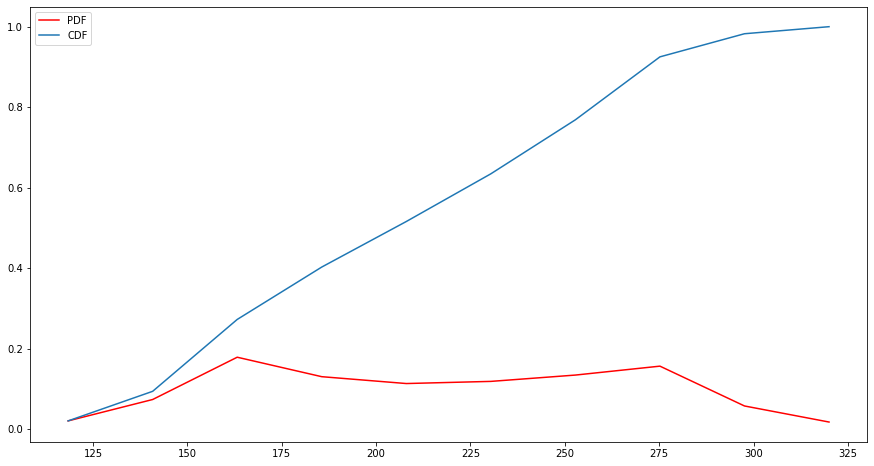

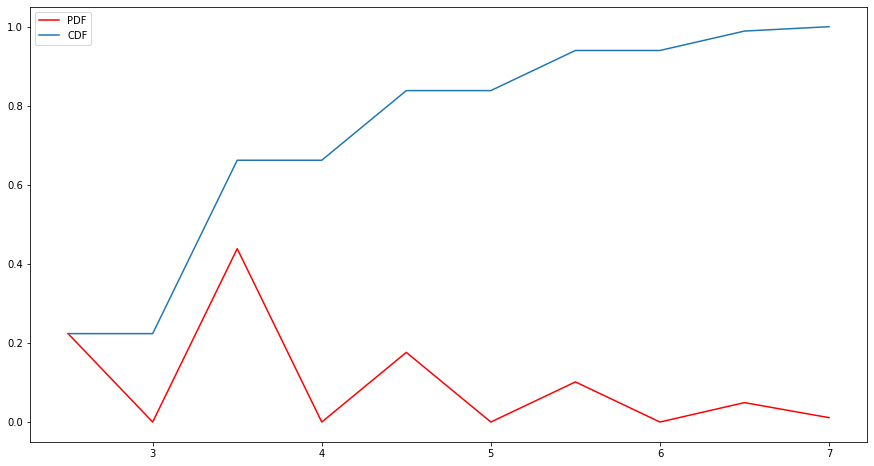

In [153]:
for column in ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company']:
    count, bins_count = np.histogram(eda_df[column], bins=10)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.subplots(figsize=(15, 8))
    plt.plot(bins_count[1:], pdf, color="red", label="PDF")
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()

In [171]:
dill_dump_session('5.3_univariate_analysis_completed')

## 5.4 Bi-Variate Plots

In [ ]:
dill_load_session('5.3_univariate_analysis_completed')

Attrition
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: satisfaction_level, dtype: object

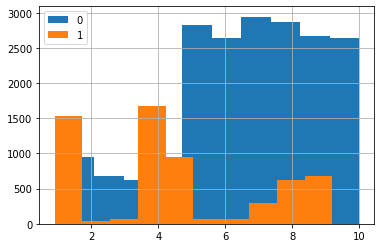

In [58]:
original_dpp_df.groupby('Attrition').satisfaction_level.hist(legend=True)

In [103]:
all_columns = eda_df.columns.tolist()
all_columns.remove('Attrition')
all_columns_except_attrition = all_columns
print("\n", all_columns)
print("\n\n", all_columns_except_attrition)


 ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident_False', 'Work_accident_True', 'promotion_last_5years_False', 'Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium']


 ['satisfaction_level', 'last_evaluation_rating', 'projects_worked_on', 'average_montly_hours', 'time_spend_company', 'Work_accident_False', 'Work_accident_True', 'promotion_last_5years_False', 'Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical', 'salary_high', 'salary_low', 'salary_medium']


In [104]:
eda_df.columns.tolist()

['satisfaction_level',
 'last_evaluation_rating',
 'projects_worked_on',
 'average_montly_hours',
 'time_spend_company',
 'Attrition',
 'Work_accident_False',
 'Work_accident_True',
 'promotion_last_5years_False',
 'Department_IT',
 'Department_RandD',
 'Department_accounting',
 'Department_hr',
 'Department_management',
 'Department_marketing',
 'Department_product_mng',
 'Department_sales',
 'Department_support',
 'Department_technical',
 'salary_high',
 'salary_low',
 'salary_medium']

In [106]:
# for index, column in enumerate(all_columns_except_attrition):
#     plt.figure(index)
#     plt.subplots(figsize=(30, 15))
#     sns.scatterplot(x=eda_df.index, y=eda_df[column], hue=eda_df['Attrition'])